In [19]:
import numpy
import matplotlib.pyplot as plt
import tqdm

In [17]:
def pH(C_fa, C_b):
    K_fa1, K_fa2,  K_a, K_b, K_w = 10 ** (-3.03), 10 ** (4.44), 10 ** 8.08, 10 ** 0.56, 10 ** (-14)
    def charge_balance(pH):
        Ch = 10 ** (-pH)
        C_fa_minus = K_fa1 * C_fa / (K_fa1 + Ch)
        C_fa_minus2 = K_fa2 * C_fa_minus / (K_fa2 + Ch)
        C_oh_minus = K_w / Ch
        C_na_plus = K_b * C_b / (K_b + C_oh_minus)

        balance = Ch + C_na_plus - C_fa_minus - C_fa_minus2 - C_oh_minus
        return balance

    pHs = numpy.linspace(0, 14, 100000)
    CBs = charge_balance(pHs)
    indx = numpy.argmin(abs(CBs))
    pH = pHs[indx]
    if abs(CBs[indx]) > 1e-3:
        print(CBs[indx])
    return pH


In [20]:
Cfa = 0.5
Cbs = numpy.linspace(0, 4, 1000)
pHs = [pH(Cfa, Cb) for Cb in tqdm.tqdm_notebook(Cbs)]

0.002907909201620207
0.006047263291260929
0.009186617380902096
0.012325971470542818
0.015465325560183985
0.018604679649824707
0.02174403373946543
0.024883387829106596
0.028022741918747318
0.03116209600838804
0.03430145009802921
0.03744080418767037
0.04058015827731065
0.04371951236695182
0.04685886645659254
0.04999822054623415
0.05313757463587443
0.056276928725515596
0.05941628281515632
0.06255563690479704
0.06569499099443821
0.06883434508407893
0.0719736991737201
0.07511305326336082
0.07825240735300154
0.08139176144264271
0.08453111553228387
0.0876704696219246
0.09080982371156532
0.09394917780120604
0.09708853189084721
0.10022788598048837
0.10336724007012865
0.10650659415976982
0.10964594824941054
0.11278530233905215
0.11592465642869243
0.1190640105183336
0.12220336460797432
0.12534271869761549
0.1284820727872562
0.13162142687689693
0.1347607809665381
0.13790013505617882
0.14103948914581999
0.1441788432354607
0.14731819732510187
0.15045755141474215
0.15359690550438332
0.156736259594024

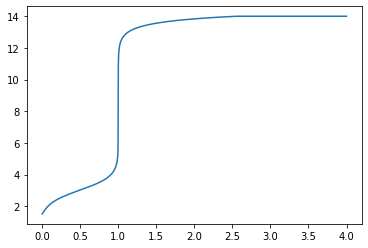

In [21]:
plt.plot(Cbs, pHs)
plt.show()